# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [11]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 639


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [20]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# # Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}&appid={weather_api_key}&units=metric"
    
#     # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
         # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

#         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#     # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# # Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
print(city_url)

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lupane
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | karymskoye
Processing Record 4 of Set 1 | minas de marcona
Processing Record 5 of Set 1 | midvagur
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | nar'yan-mar
Processing Record 8 of Set 1 | mossel bay
Processing Record 9 of Set 1 | kerikeri
Processing Record 10 of Set 1 | al ghayzah
Processing Record 11 of Set 1 | edinburgh of the seven seas
Processing Record 12 of Set 1 | margaret river
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | sao jose da coroa grande
Processing Record 15 of Set 1 | kidatu
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | afaahiti
Processing Record 18 of Set 1 | eisenach
Processing Record 19 of Set 1 | isafjordur
Processing Record 20 of Set 1 | vorgashor
Processing Record 21 of Set 1 | stanley
Processing Record 22 of Set 1 | 

In [21]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          611
Lat           611
Lng           611
Max Temp      611
Humidity      611
Cloudiness    611
Wind Speed    611
Country       611
Date          611
dtype: int64

In [22]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lupane,-18.9315,27.8070,7.32,47,0,2.26,ZW,1687832060
1,adamstown,-25.0660,-130.1015,21.78,80,22,9.35,PN,1687832060
2,karymskoye,51.6167,114.3500,17.89,92,100,0.84,RU,1687832060
3,minas de marcona,-15.2119,-75.1103,12.36,87,55,5.60,PE,1687832060
4,midvagur,62.0511,-7.1939,10.46,93,75,1.54,FO,1687832061


In [25]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [26]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lupane,-18.9315,27.8070,7.32,47,0,2.26,ZW,1687832060
1,adamstown,-25.0660,-130.1015,21.78,80,22,9.35,PN,1687832060
2,karymskoye,51.6167,114.3500,17.89,92,100,0.84,RU,1687832060
3,minas de marcona,-15.2119,-75.1103,12.36,87,55,5.60,PE,1687832060
4,midvagur,62.0511,-7.1939,10.46,93,75,1.54,FO,1687832061


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

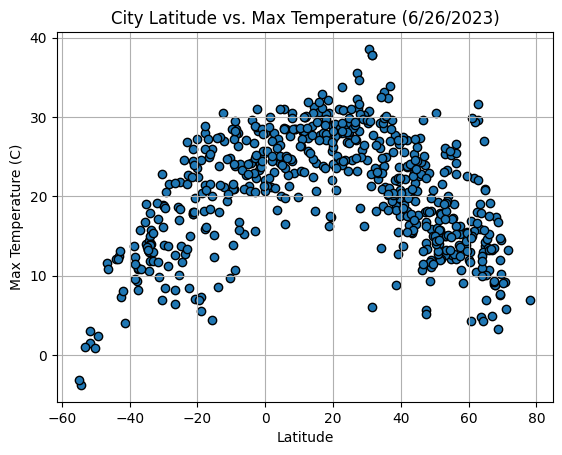

In [34]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']

plt.scatter(x_axis, y_axis, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs. Max Temperature (6/26/2023)')
plt.grid(which='both')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

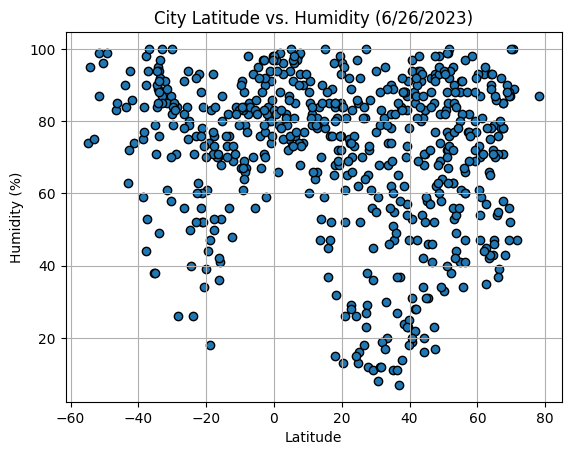

In [36]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']

plt.scatter(x_axis, y_axis, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (6/26/2023)')
plt.grid(which='both')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

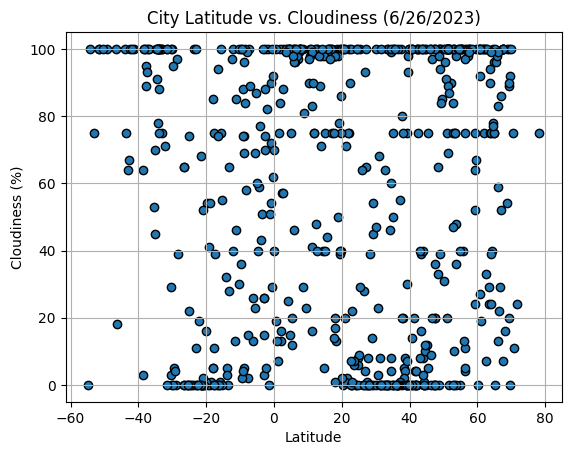

In [37]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df['Lat']
y_axis = city_data_df['Cloudiness']

plt.scatter(x_axis, y_axis, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (6/26/2023)')
plt.grid(which='both')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

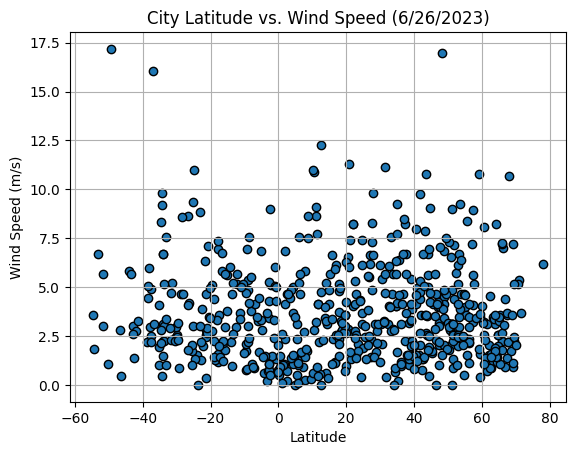

In [38]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']

plt.scatter(x_axis, y_axis, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (6/26/2023)')
plt.grid(which='both')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [81]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

In [43]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0].reset_index()

# Display sample data
northern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,2,karymskoye,51.6167,114.3500,17.89,92,100,0.84,RU,1687832060
1,4,midvagur,62.0511,-7.1939,10.46,93,75,1.54,FO,1687832061
2,6,nar'yan-mar,67.6713,53.0870,8.86,85,100,2.21,RU,1687832061
3,9,al ghayzah,16.2079,52.1760,27.75,85,100,2.37,YE,1687832063
4,12,albany,42.6001,-73.9662,19.96,94,100,1.34,US,1687831201


In [44]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<=0].reset_index()

# Display sample data
southern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,lupane,-18.9315,27.8070,7.32,47,0,2.26,ZW,1687832060
1,1,adamstown,-25.0660,-130.1015,21.78,80,22,9.35,PN,1687832060
2,3,minas de marcona,-15.2119,-75.1103,12.36,87,55,5.60,PE,1687832060
3,5,waitangi,-43.9535,-176.5597,12.12,90,100,5.81,NZ,1687831773
4,7,mossel bay,-34.1831,22.1460,12.96,89,78,9.20,ZA,1687832061


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6590155746685978


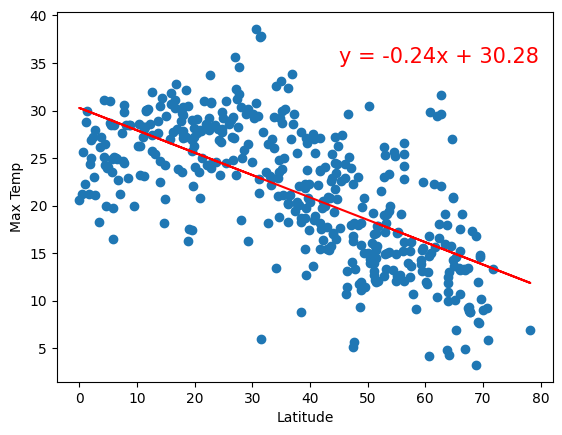

In [108]:
# Linear regression on Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-value is: {rvalue}')
plt.scatter(x_axis, y_axis)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.plot(x_axis, regress_values,"r-")
plt.annotate(line_equation, xy=(45, 35), fontsize=15,color="red", )
plt.show()

The r-value is: 0.7348450603096448


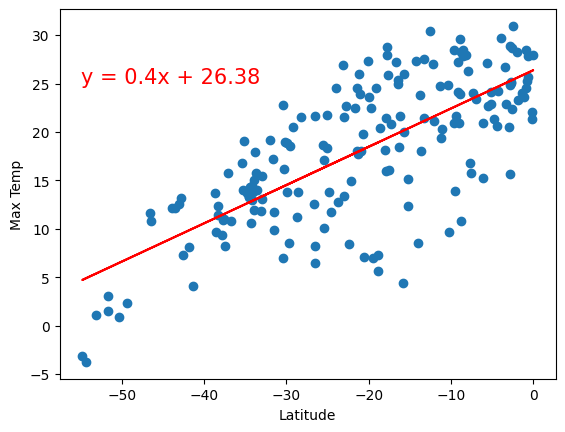

In [109]:
# Linear regression on Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-value is: {rvalue}')
plt.scatter(x_axis, y_axis)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.plot(x_axis, regress_values,"r-")
plt.annotate(line_equation, xy=(-55, 25), fontsize=15,color="red", )
plt.show()

**Discussion about the linear relationship:** It is observed that there is a negative correlation between latitude and the maximum temperature in the northern hemisphere, meaning as latitude increases, the maximum temperature tends to decrease.  The inverse is true for the southern hemisphere, showing a positive correlation in that as latitude decreases, the maximum temperature tends to increase.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.0913582103188785


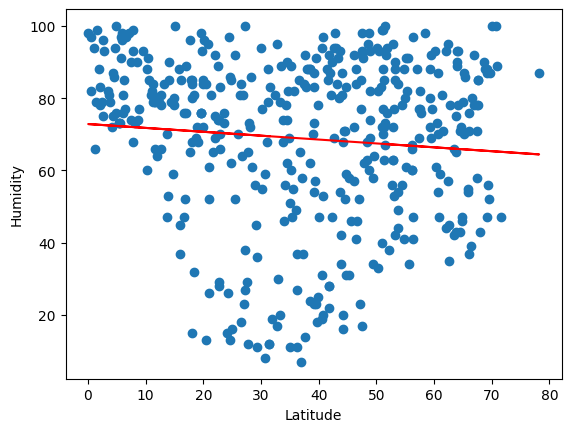

In [111]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-value is: {rvalue}')
plt.scatter(x_axis, y_axis)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.plot(x_axis, regress_values,"r-")
plt.annotate(line_equation, xy=(-55, 30), fontsize=15,color="red", )
plt.show()

The r-value is: -0.047547095654224464


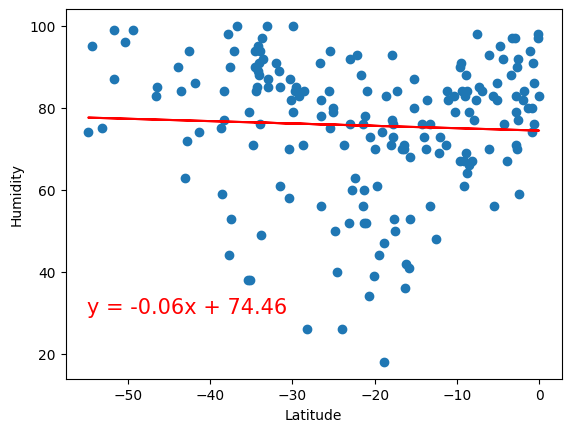

In [123]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-value is: {rvalue}')
plt.scatter(x_axis, y_axis)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.plot(x_axis, regress_values,"r-")
plt.annotate(line_equation, xy=(-55, 30), fontsize=15,color="red", )
plt.show()

**Discussion about the linear relationship:** For both the southern and northern hemispheres, the differences in humidity levels showed a very slight negative correlation, almost showing no significance regardless of latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.006149643693591297


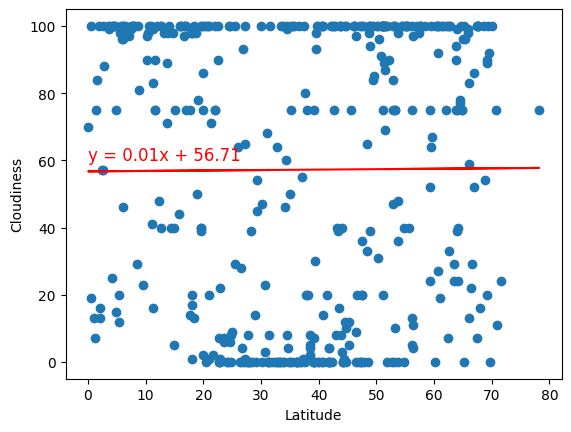

In [124]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-value is: {rvalue}')
plt.scatter(x_axis, y_axis)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.plot(x_axis, regress_values,"r-")
plt.annotate(line_equation, xy=(0, 60), fontsize=12,color="red", )
plt.show()

The r-value is: -0.20925628896141213


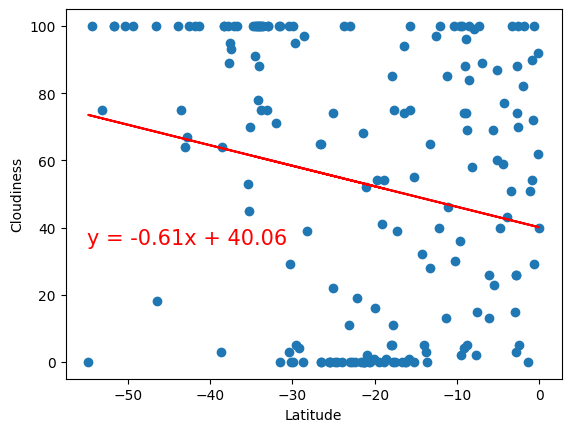

In [125]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-value is: {rvalue}')
plt.scatter(x_axis, y_axis)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.plot(x_axis, regress_values,"r-")
plt.annotate(line_equation, xy=(-55, 35), fontsize=15,color="red", )
plt.show()

**Discussion about the linear relationship:** The northern hemisphere showed virtually no correlation with latitude and cloud cover.  However, the southern hemisphere showed a negative correlation as cloudiness decreased when latitude increased.  This could be the result of different weather patterns dominating the two hemispheres at the time the data was captureed.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.024166994026661236


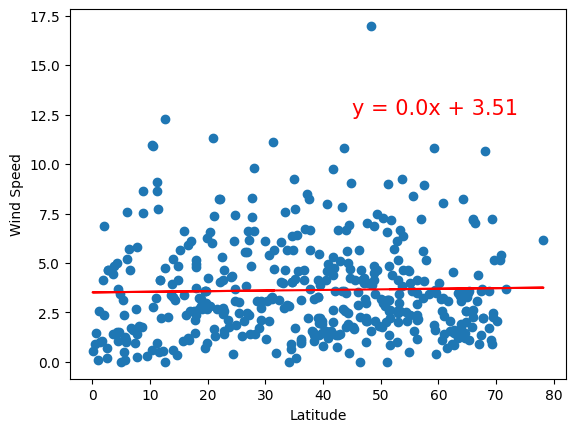

In [126]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-value is: {rvalue}')
plt.scatter(x_axis, y_axis)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.plot(x_axis, regress_values,"r-")
plt.annotate(line_equation, xy=(45, 12.5), fontsize=15,color="red", )
plt.show()

The r-value is: -0.16426000376089314


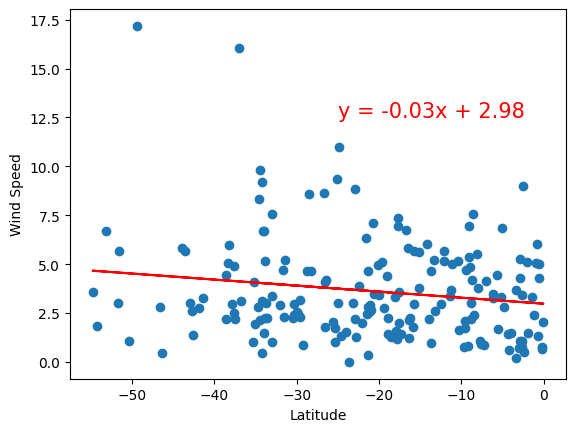

In [129]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-value is: {rvalue}')
plt.scatter(x_axis, y_axis)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.plot(x_axis, regress_values,"r-")
plt.annotate(line_equation, xy=(-25, 12.5), fontsize=15,color="red", )
plt.show()

**Discussion about the linear relationship:** In the northern hemisphere, there is no correlation between latitude and wind speed.  The southern hemisphere, however, shows a slight negative correlation with the decrease in latitude and the decrease in wind speed.